<a href="https://colab.research.google.com/github/zeynebe/Zeynebe/blob/main/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

# We'll import the cv2(computer vision 2) and PIL (Python Imaging Library) libraries 
# to open, work and process our images
import cv2    
import PIL

# image data preprocessing
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Pathlib module ensures that your file paths work the same in different operating systems
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models

# Working with directory library
from os import path, listdir
from os.path import isdir

# Image visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\ Drive/kagglecatsanddogs_5340.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  i

In [4]:
# Let's see the first 5 image files and name our dataset as data
data = pathlib.Path("/content/PetImages")
print(data)
list(data.glob('*/*.jpg'))[:5]


/content/PetImages


[PosixPath('/content/PetImages/Dog/8323.jpg'),
 PosixPath('/content/PetImages/Dog/6495.jpg'),
 PosixPath('/content/PetImages/Dog/5974.jpg'),
 PosixPath('/content/PetImages/Dog/5833.jpg'),
 PosixPath('/content/PetImages/Dog/2310.jpg')]

In [5]:
# Preparing the "Dogs" list
dogs = list(data.glob('Dog/*'))
dogs[:5]

[PosixPath('/content/PetImages/Dog/8323.jpg'),
 PosixPath('/content/PetImages/Dog/6495.jpg'),
 PosixPath('/content/PetImages/Dog/5974.jpg'),
 PosixPath('/content/PetImages/Dog/5833.jpg'),
 PosixPath('/content/PetImages/Dog/2310.jpg')]

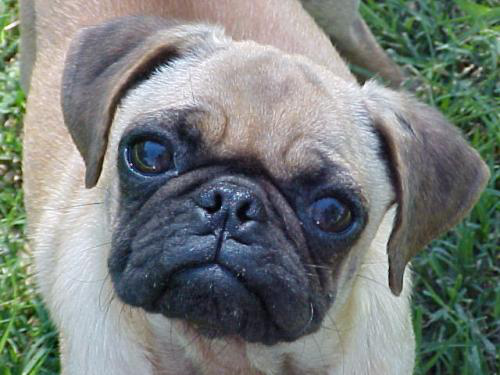

In [6]:
# Looking at a Dog image
PIL.Image.open(str(dogs[1]))

In [7]:
# Preparing the "Cats" list
cats = list(data.glob('Cat/*'))
cats[:5]

[PosixPath('/content/PetImages/Cat/8323.jpg'),
 PosixPath('/content/PetImages/Cat/6495.jpg'),
 PosixPath('/content/PetImages/Cat/5974.jpg'),
 PosixPath('/content/PetImages/Cat/5833.jpg'),
 PosixPath('/content/PetImages/Cat/2310.jpg')]

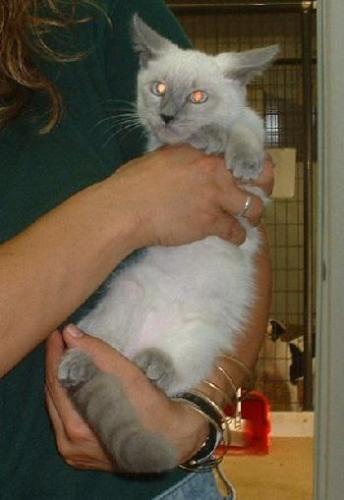

In [8]:
# Let's see the lucky cat which will be our "open image" example 
PIL.Image.open(str(cats[1]))

In [9]:
# how many images do we have to work with?
image_count = len(list(data.glob('*/*.jpg')))
print(image_count)

25000


We will get the images from the files and first create "images" and "labels" dictionaries for the following resizing process.

In [10]:
pet_images_dict = {
    'cats': list(data.glob('Cat/*')),
    'dogs': list(data.glob('Dog/*')),
}

pet_labels_dict = {
    'cats': 0,
    'dogs': 1,
}

In [11]:
# lets see the first 3 elements in our cats dictionary
pet_images_dict['cats'][:3]

[PosixPath('/content/PetImages/Cat/8323.jpg'),
 PosixPath('/content/PetImages/Cat/6495.jpg'),
 PosixPath('/content/PetImages/Cat/5974.jpg')]

In [18]:
len(pet_images_dict)

2

We will resize the images (as 128X128) to make their sizes equal and create a "Resized_images_list" and "Labels_list".

In [30]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
Resized_images_list, Labels_list = [], []

for pet_name, images in pet_images_dict.items():
    print(pet_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            print('image not found')
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            Resized_images_list.append(resized_img)
            Labels_list.append(pet_labels_dict[pet_name])
        else:
            print("Invalid Image")
            continue

cats
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
image not found
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
image not found
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
image not found
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
image not found
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid Image
Invalid

In [31]:
#our lists are shorter because of the invalid and "not found" elements.
print(len(Resized_images_list))
print(len(Labels_list))

24437
24437


In [32]:
# We'll rename our lists "Resized_images" and "Labels" lists 
# as X and Y to prepare for train test split method

# our X set is formed up of resized cats and dogs images
X = np.array(Resized_images_list) 
# our Y (target) set is made up of 0's and 1's which are 
# the labels for "cats" & "dogs" respectively
Y = np.array(Labels_list) 

# Let's check if everything is fine and they are still both lists
type(X)
type(Y)

numpy.ndarray

In [ ]:
# Dividing the data as X_train, y_train, X_val, y_val, X_test ve y_test 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))
print(len(X_val),len(y_val))

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape,y_val.shape)

15639 15639
4888 4888
3910 3910
(15639, 128, 128, 3) (15639,)
(4888, 128, 128, 3) (4888,)
(3910, 128, 128, 3) (3910,)


We will use a convolutional neural network and train the data with the sequential model. We'll use "dropout" to alleviate overfitting.

In [39]:
IMAGE_CHANNELS=3
model = Sequential([

Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [40]:
history=model.fit(X_train, y_train, epochs=5)

Epoch 1/5
489/489 [==============================] - 396s 808ms/step - loss: 0.6966 - accuracy: 0.6637
Epoch 2/5
489/489 [==============================] - 391s 800ms/step - loss: 0.4967 - accuracy: 0.7626
Epoch 3/5
489/489 [==============================] - 389s 796ms/step - loss: 0.4268 - accuracy: 0.8054
Epoch 4/5
489/489 [==============================] - 382s 780ms/step - loss: 0.3992 - accuracy: 0.8193
Epoch 5/5
489/489 [==============================] - 378s 773ms/step - loss: 0.3444 - accuracy: 0.8466


In [42]:
# we trained our model with 5 epochs and final accuracy is 85%
# lets look at model evaluation scores

model.evaluate(X_test, y_test)

153/153 [==============================] - 29s 192ms/step - loss: 0.4173 - accuracy: 0.8093


[0.41726481914520264, 0.8093289732933044]

In [43]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)
y_pred_classes = [0 if element < 0.5 else 1 for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      2441
           1       0.83      0.78      0.80      2447

    accuracy                           0.81      4888
   macro avg       0.81      0.81      0.81      4888
weighted avg       0.81      0.81      0.81      4888



our trainining and test accuracies were 85% and 79% respectively.

Evaluating the accuracy and loss for each epoch

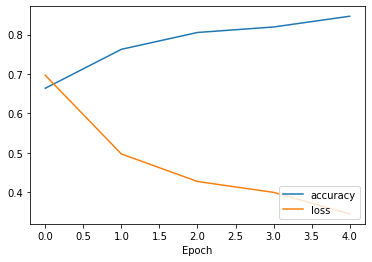

In [44]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()